# Democracy and Economic Dvelopment
## Michelle Sabbagh
## Data Bootcamp Final Project

## I. Overview

Central Research Question: What is the relationship, if any, between a country’s level of freedom and economic development? 

In academically incorrect terms, the question could be phrased as: What is the relationship, if any, between a country’s level of democracy and economic development? I am intentionally avoiding the term democracy because it is usually measured by degrees of electoral rights. Many countries host rigged elections; presenting a flaw in the democracy variable. For example, North Korea would be considered a democracy because they host elections—with only one candidate on the ballot. To prevent pseudo-democracies from skewing my results the question is asked in terms of freedom and development. 

Since the collapse of communism, the democratization trend has been en vogue globally. One of the main arguments for democratizing governments is that democracies allow for increased economic development. However, with the rise of oil rich authoritarian regimes the hypothesis of democracy yielding high levels of economic development is subject to question.

My project will unpack the correlation between economic development and freedom by grappling with the following question: Do countries with a higher degree of freedom experience greater economic development? 

Levels of freedom will be measured by a country’s civil liberties and political rights score, provided by Freedom House. Economic development will be measured in GDP per capita by the World Bank’s World Development Indicators.


## II. Accessing World Bank Data

The World Bank releases their data on 264 countries' GDP per capita from the years 1960-2016. 


### Step One: Install World Bank Data

Use pip to install wbdata, a library for getting data from the Wolrd Bank, by typing "pip install wbdata" into your terminal. Ensure all necessary packages, pandas, seaborn, matplotlib are installed as well.

In [192]:
%matplotlib inline
import pandas
import wbdata
import matplotlib.pyplot as plt      
import seaborn as sns

### Step Two: Read World Bank Data

In [193]:
indicators = {'NY.GDP.PCAP.CD':"GDP Per Capita"}
economic_df = wbdata.get_dataframe(indicators=indicators)

### Step Three: View World Bank Data

In [194]:
economic_df.tail(15)

GDP Per Capita
country  date                
Zimbabwe 1983      947.118803
         1982     1084.211762
         1981     1058.031013
         1980      916.283736
         1979      736.359311
         1978      640.228788
         1977      663.205470
         1976      677.502637
         1975      708.444004
         1974      667.267787
         1973      573.705694
         1972      480.455679
         1971      404.564148
         1970      361.908134
         1969      347.078512

Access just one level of the multi-index

In [195]:
economic_df.xs('2015', level='date')

,GDP Per Capita
country,
Arab World,6537.301118
Caribbean small states,9405.830849
Central Europe and the Baltics,12412.980979
Early-demographic dividend,3185.439544
East Asia & Pacific,9537.770428
East Asia & Pacific (excluding high income),6516.774456
East Asia & Pacific (IDA & IBRD countries),6585.709172
Euro area,34168.886088
Europe & Central Asia,22157.919630


### Data Description
There are 15,048 rows and 1 column in the World Bank dataset


In [196]:
economic_df.shape

(15048, 1)

The variables included in this dataset are:

In [197]:
economic_df.columns

Index(['GDP Per Capita'], dtype='object')

### Descriptive statistics on the dataset:

In [198]:
economic_df.describe()

,GDP Per Capita
count,11312.000000
mean,6830.412924
std,13799.693951
min,35.367727
25%,451.847919
50%,1551.070917
75%,6074.535308
max,193648.132213


## III. Accessing Freedom House Data

Freedom House is an international watchdog organization that releases a civil liberties and political rights evaluation for 195 countries. Each country is given a score from 1 to 7 , with 1 being the most free and 7 being the least free. Amanda B. Edgell, a PhD candidate in Comparative Politics at the University of Florida released a version of Freedom House's data which also includes scale inverted, averages, minimum, and maximums,correlates of war, state abbreviations, and state codes.

The data was gathered from: https://acrowinghen.files.wordpress.com/2014/03/fh1972_20161.xlsx


### Step One: Read Freedom House Data

In [199]:
freedomhouse_df = pandas.read_excel("fh1972_20161.xlsx", header=0, sheetname=1).set_index('country').rename(columns={"year": "date"})

### Step Two: View Freedom House Data

In [200]:
freedomhouse_df.head(15)

,scode,ccode,date,edition,pr,cl,status,inverse_pr,inverse_cl,mean,inverse_mean,sum,inverse_sum,min,max,inverse_min,inverse_max
country,,,,,,,,,,,,,,,,,
United States,USA,2,1972,Jan.-Feb. 1973,1,1,Free,7,7,1.0,7.0,2,14,1,1,7,7
United States,USA,2,1973,Jan.-Feb. 1974,1,1,Free,7,7,1.0,7.0,2,14,1,1,7,7
United States,USA,2,1974,Jan.-Feb. 1975,1,1,Free,7,7,1.0,7.0,2,14,1,1,7,7
United States,USA,2,1975,Jan.-Feb. 1976,1,1,Free,7,7,1.0,7.0,2,14,1,1,7,7
United States,USA,2,1976,Jan.-Feb. 1977,1,1,Free,7,7,1.0,7.0,2,14,1,1,7,7
United States,USA,2,1977,1978,1,1,Free,7,7,1.0,7.0,2,14,1,1,7,7
United States,USA,2,1978,1979,1,1,Free,7,7,1.0,7.0,2,14,1,1,7,7
United States,USA,2,1979,1980,1,1,Free,7,7,1.0,7.0,2,14,1,1,7,7
United States,USA,2,1980,1981,1,1,Free,7,7,1.0,7.0,2,14,1,1,7,7


### Data Description

There are 7,843 rows and 18 columns in the Freedom House dataset


In [201]:
freedomhouse_df.shape

(7843, 17)

The variables included in this dataset are:


In [202]:
freedomhouse_df.columns

Index(['scode', 'ccode', 'date', 'edition', 'pr', 'cl', 'status', 'inverse_pr',
       'inverse_cl', 'mean', 'inverse_mean', 'sum', 'inverse_sum', 'min',
       'max', 'inverse_min', 'inverse_max'],
      dtype='object')

The table below provides a data dictionary of the aforementioned variables

In [203]:
freedomhouse_dd = pandas.read_excel("fh1972_20161.xlsx", header=0, sheetname=0)

In [204]:
freedomhouse_dd.head(30)

,Source:,"Freedom House. 2014. Freedom in the World, 1973-2016. Available at: https://freedomhouse.org/report/freedom-world/freedom-world-2016"
0,NaN,NaN
1,scode,"Correlates of War, State Code"
2,ccode,"Correlates of War, Country Code"
3,country,Country Name from Freedom House Data
4,year,Data year
5,edition,Edition of Freedom House Freedom in the World
6,pr,"Freedom House, Political Rights Score"
7,cl,"Freedom House, Civil Liberties Score"
8,status,"Freedom House, Country Status"
9,inverse_pr,Scale-inverted Freedom House Political Rights ...


### Descriptive statistics on the dataset

In [205]:
freedomhouse_df.describe()

,ccode,date,pr,cl,inverse_pr,inverse_cl,mean,inverse_mean,sum,inverse_sum,min,max,inverse_min,inverse_max
count,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000
mean,467.420375,1994.581028,3.772791,3.733138,4.227209,4.266862,3.752964,4.247036,7.505929,8.427005,3.478643,4.027285,3.972715,4.521357
std,263.088949,12.545044,2.237468,1.952198,2.237468,1.952198,2.057888,2.057888,4.115777,4.123275,2.039497,2.123218,2.123218,2.039497
min,2.000000,1972.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,235.000000,1984.000000,1.500000,2.000000,2.000000,3.000000,1.500000,2.500000,3.000000,5.000000,1.000000,2.000000,2.000000,3.000000
50%,461.000000,1995.000000,4.000000,4.000000,4.000000,4.000000,3.500000,4.500000,7.000000,8.000000,3.000000,4.000000,4.000000,5.000000
75%,679.000000,2005.000000,6.000000,5.000000,6.500000,6.000000,5.500000,6.500000,11.000000,12.000000,5.000000,6.000000,6.000000,7.000000
max,990.000000,2015.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,14.000000,14.000000,7.000000,7.000000,7.000000,7.000000


## IV. Analytics Prep
In order to run the necessary analysis, I combined the World Bank Data and Freedom House datasets. To reflect the most up to date information I will only use data from 2015.

In [206]:
combined_df = economic_df.xs('2015', level='date').join(freedomhouse_df[freedomhouse_df["date"] == 2015]).dropna()

In [207]:
combined_df

,GDP Per Capita,scode,ccode,date,edition,pr,cl,status,inverse_pr,inverse_cl,mean,inverse_mean,sum,inverse_sum,min,max,inverse_min,inverse_max
country,,,,,,,,,,,,,,,,,,
Afghanistan,594.323081,AFG,700.0,2015.0,2016,6.0,6.0,Not Free,2.0,2.0,6.0,2.0,12.0,4.0,6.0,6.0,2.0,2.0
Albania,3945.217582,ALB,339.0,2015.0,2016,3.0,3.0,Partly Free,5.0,5.0,3.0,5.0,6.0,10.0,3.0,3.0,5.0,5.0
Algeria,4154.119692,ALG,615.0,2015.0,2016,6.0,5.0,Not Free,2.0,3.0,5.5,2.5,11.0,5.0,5.0,6.0,2.0,3.0
Angola,4101.472152,ANG,540.0,2015.0,2016,6.0,6.0,Not Free,2.0,2.0,6.0,2.0,12.0,4.0,6.0,6.0,2.0,2.0
Argentina,13467.415641,ARG,160.0,2015.0,2016,2.0,2.0,Free,6.0,6.0,2.0,6.0,4.0,12.0,2.0,2.0,6.0,6.0
Armenia,3489.127690,ARM,371.0,2015.0,2016,5.0,4.0,Partly Free,3.0,4.0,4.5,3.5,9.0,7.0,4.0,5.0,3.0,4.0
Australia,56290.646809,AUL,900.0,2015.0,2016,1.0,1.0,Free,7.0,7.0,1.0,7.0,2.0,14.0,1.0,1.0,7.0,7.0
Austria,43636.753702,AUS,305.0,2015.0,2016,1.0,1.0,Free,7.0,7.0,1.0,7.0,2.0,14.0,1.0,1.0,7.0,7.0
Azerbaijan,5497.488414,AZE,373.0,2015.0,2016,7.0,6.0,Not Free,1.0,2.0,6.5,1.5,13.0,3.0,6.0,7.0,1.0,2.0


In [208]:
# Descriptive statistics on the merged World Bank Data and Freedom House data in 2015
combined_df.describe()

,GDP Per Capita,ccode,date,pr,cl,inverse_pr,inverse_cl,mean,inverse_mean,sum,inverse_sum,min,max,inverse_min,inverse_max
count,160.000000,160.000000,160.0,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,12851.743128,471.475000,2015.0,3.293750,3.287500,4.706250,4.712500,3.290625,4.709375,6.581250,9.418750,3.087500,3.493750,4.506250,4.912500
std,18208.827249,259.574808,0.0,2.117899,1.840794,2.117899,1.840794,1.955055,1.955055,3.910109,3.910109,1.871291,2.071055,2.071055,1.871291
min,277.068309,2.000000,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,1553.617444,308.750000,2015.0,1.000000,2.000000,3.000000,3.000000,1.500000,3.000000,3.000000,6.000000,1.000000,2.000000,3.000000,3.000000
50%,5033.156483,451.500000,2015.0,3.000000,3.000000,5.000000,5.000000,3.000000,5.000000,6.000000,10.000000,3.000000,3.000000,5.000000,5.000000
75%,14298.733512,675.000000,2015.0,5.000000,5.000000,7.000000,6.000000,5.000000,6.500000,10.000000,13.000000,5.000000,5.000000,6.000000,7.000000
max,99717.744717,990.000000,2015.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,14.000000,14.000000,7.000000,7.000000,7.000000,7.000000


## V. Case Study: How Does the Wealthiest Country, Luxembourg, Change Over Time?

In [209]:
#I sorted the data by the highest level of GDP per Capita. Luxembourg had the highest GDP per capita in 2015
combined_df.sort_values('GDP Per Capita', ascending=False)

,GDP Per Capita,scode,ccode,date,edition,pr,cl,status,inverse_pr,inverse_cl,mean,inverse_mean,sum,inverse_sum,min,max,inverse_min,inverse_max
country,,,,,,,,,,,,,,,,,,
Luxembourg,99717.744717,LUX,212.0,2015.0,2016,1.0,1.0,Free,7.0,7.0,1.0,7.0,2.0,14.0,1.0,1.0,7.0,7.0
Switzerland,80999.287419,SWZ,225.0,2015.0,2016,1.0,1.0,Free,7.0,7.0,1.0,7.0,2.0,14.0,1.0,1.0,7.0,7.0
Norway,74481.819379,NOR,385.0,2015.0,2016,1.0,1.0,Free,7.0,7.0,1.0,7.0,2.0,14.0,1.0,1.0,7.0,7.0
Qatar,73653.394435,QAT,694.0,2015.0,2016,6.0,5.0,Not Free,2.0,3.0,5.5,2.5,11.0,5.0,5.0,6.0,2.0,3.0
Ireland,61093.691084,IRE,205.0,2015.0,2016,1.0,1.0,Free,7.0,7.0,1.0,7.0,2.0,14.0,1.0,1.0,7.0,7.0
Australia,56290.646809,AUL,900.0,2015.0,2016,1.0,1.0,Free,7.0,7.0,1.0,7.0,2.0,14.0,1.0,1.0,7.0,7.0
United States,56115.718426,USA,2.0,2015.0,2016,1.0,1.0,Free,7.0,7.0,1.0,7.0,2.0,14.0,1.0,1.0,7.0,7.0
Denmark,53014.644162,DEN,390.0,2015.0,2016,1.0,1.0,Free,7.0,7.0,1.0,7.0,2.0,14.0,1.0,1.0,7.0,7.0
Singapore,52888.744672,SIN,830.0,2015.0,2016,4.0,4.0,Partly Free,4.0,4.0,4.0,4.0,8.0,8.0,4.0,4.0,4.0,4.0


I was interested in looking at the richest country's GDP per capita overtime, compared to its level of freedom. The first graph indicates that Luxembourg became free in the late 1970s. Looking at the second graph, that is exactly when Luxembourg started to experience an increase in GDP per capita. In the vacuum of this case study,one would quickly conclude that democracy directly contributed to Luxembourg’s economic development.

In [210]:
date_indexed_df = economic_df.loc["Luxembourg"]
date_indexed_df.index = date_indexed_df.index.map(int)
lux_df = date_indexed_df.join(freedomhouse_df.loc["Luxembourg"].set_index('date')).sort_index()

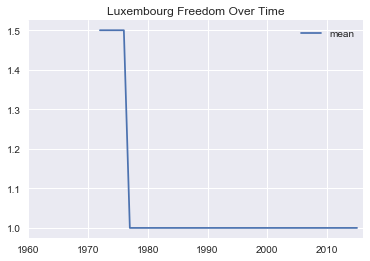

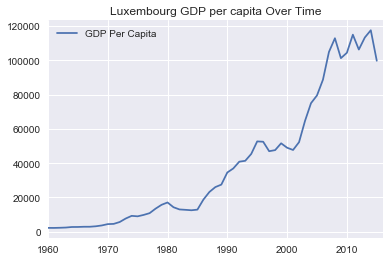

In [211]:
lux_df.plot(y=['mean'], title='Luxembourg Freedom Over Time' ) 
lux_df.plot(y=['GDP Per Capita'], title='Luxembourg GDP per capita Over Time')

## VI. Broad Analysis: Comparing GDP Per Capita and Levels of Freedom

I sorted the data by the average of the political rights score and the civil liberties score from countries with high freedom levels to countries with low freedom levels. The left-hand side on the x axis represents countries with high levels of freedom and as you move to the right, the levels of freedom decrease. It is interesting to note that the GDP per capita line is highest in areas with high levels of freedom, and lowest in countries with low levels of freedom. However, both sides of the graph experience extreme outliers. Demonstrating that as a general trend it seems that countries with higher levels of freedom do in fact experience higher levels of economic development. Yet, the variation and outliers in the graph cause us to understand that the correlation between the two variables is not directly linear and making the claim "democracies bring about economic development" is a strong broad generalization.

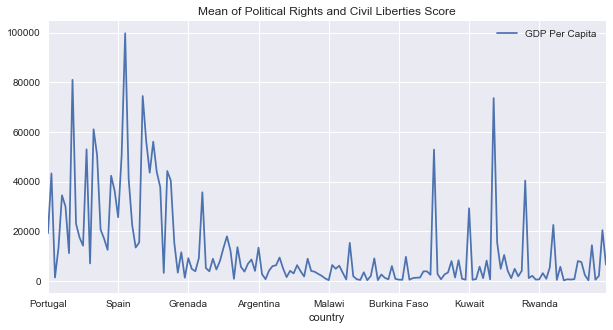

In [212]:
#This graph demostrates decreasing freedoms and their GDP per capita.
combined_df.sort_values("mean").plot(y="GDP Per Capita", kind="line",title='Mean of Political Rights and Civil Liberties Score', figsize=(10,5))

I was curious to see if the same graph would look any different if I plotted the actual civil liberties score and the political rights score. The graphs are similar to the graph of the mean above. Concluding that even when you separate civil liberties and political rights the conclusion from the first graph is very similar.


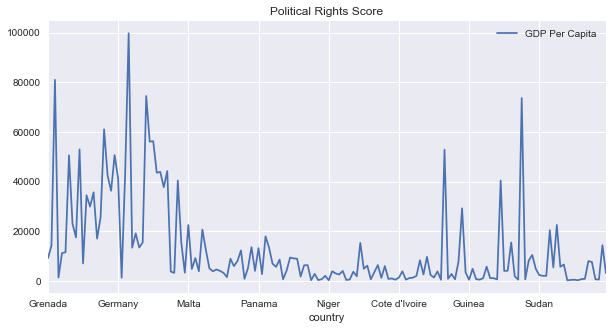

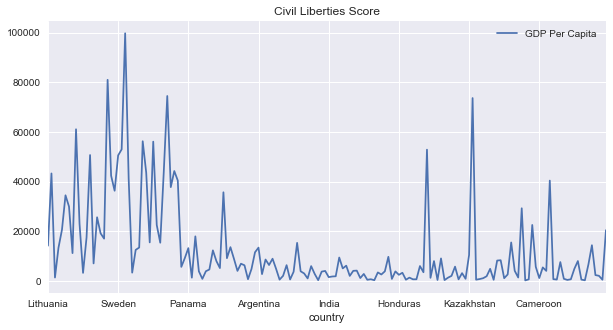

In [213]:
#These graphs compare decreasing political rights and civil liberties and their gdp per capita.
combined_df.sort_values("pr").plot(y="GDP Per Capita", kind="line",title='Political Rights Score', figsize=(10,5))
combined_df.sort_values("cl").plot(y="GDP Per Capita", kind="line",title='Civil Liberties Score', figsize=(10,5))

The graph below depicts the densest GDP per capita’s divided by their freedom status. It seems that only "free" countries have GDP's over the one hundred thousand mark, but the range in the dataset is largest in free countries. Furthermore, with a mean GDP per capita of around $ 12,851, it makes sense that the density of all the voilins is highest in that range. Notably, partly free countries experience the lowest levels of economic development, even lower than those of not free countries. Moreover, partly free countries have the smallest range in GDP per capita, mostly concentrated in the zero to ten thousand range.   

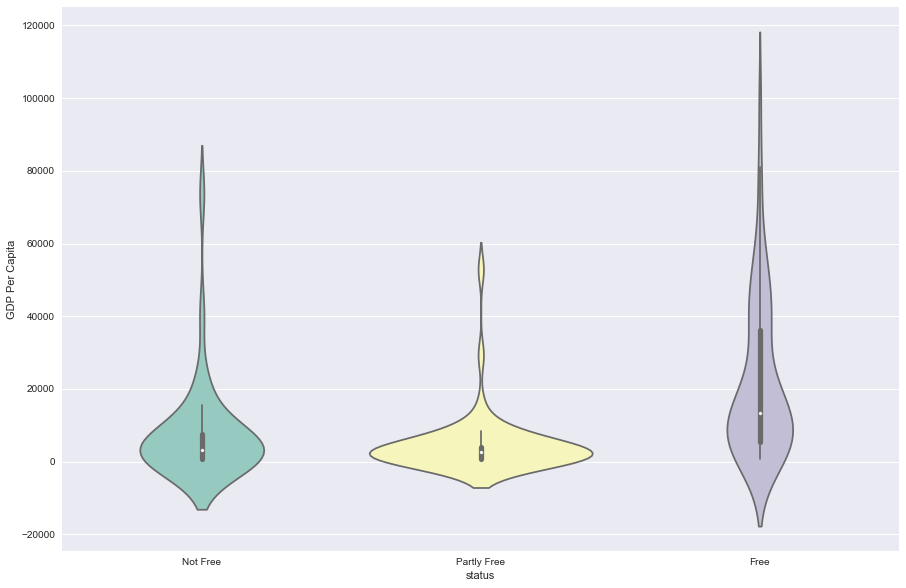

In [214]:
f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(x="status", y="GDP Per Capita", data=combined_df, palette="Set3")

These two density plots show something very similar, more free countries have outliers that are extremely rich, something you don't see in the less free countries. The first graph divides the density of the dataset by the average freedom score. Further indicating that the largest range of GDP per capita is in the free countries. Evidently, extreme wealth is only found in democratic countries even though low levels of economic development can occur in democracies as well.

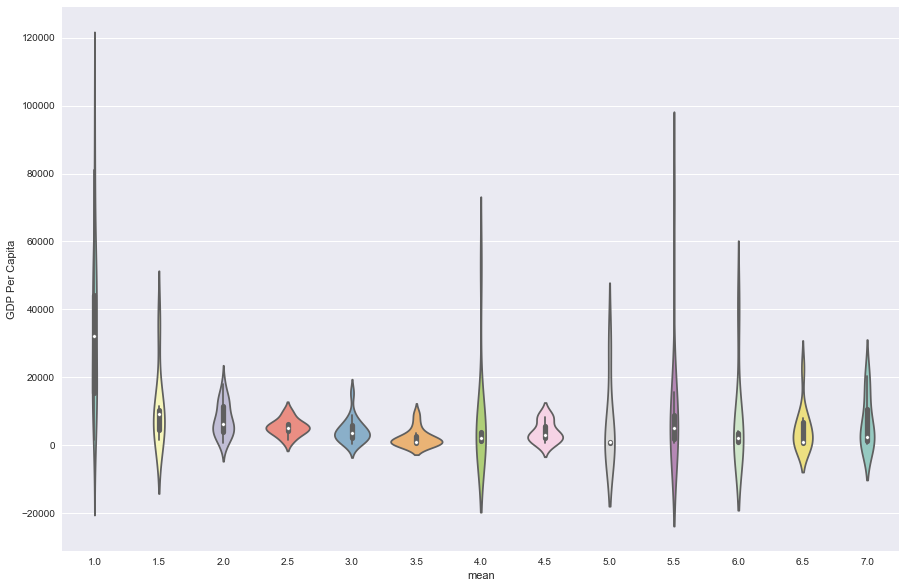

In [215]:
f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(x="mean", y="GDP Per Capita", data=combined_df, palette="Set3")

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


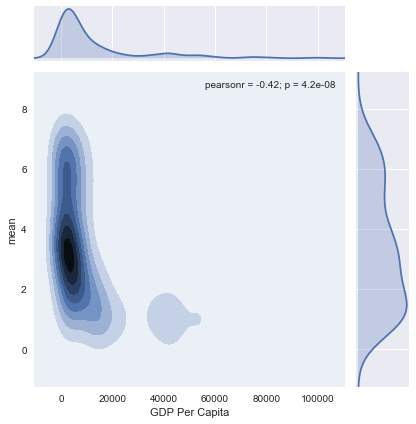

In [216]:
sns.jointplot(x='GDP Per Capita', y="mean", data=combined_df, kind='kde', )

After running the regression below, I can conclude that for the most part, a decrease in GDP per capita is associated with a decrease of freedom. Yet the relatively wealthy, not free countries are glaring outliers that cannot be ignored. 

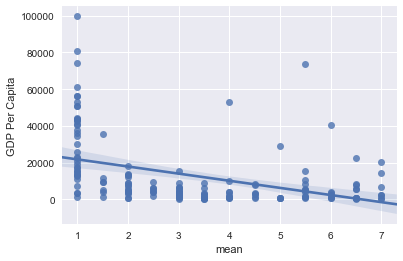

In [217]:
# Regression showing a decrease in GDP per capita with increasing mean(decreasing freedom).
sns.regplot(x='mean', y="GDP Per Capita", data=combined_df,)

## VII. Conclusion

Democracy and economic development have a complicated relationship. Looking at the Luxembourg case study it is evident that democracy does bring about economic development. However, analyzing the data on a global scale complicates the findings of the original study. Clearly there is a somewhat positive relationship between democracy and economic development. However, there are many outliers such as Qatar, Kuwait, and UAE that lack democratic values yet have high GDP's per capita. If we were to run similar case studies on these countries, we would not come to the same conclusion as in the Luxembourg study. Furthermore, partly free countries seemed to have the highest density of low GDP’s per capita and many highly democratic countries had low GDP’s per capita. So, what do we make of these conflicting results?

There is clearly more going on behind the scenes. Further research would have to be conducted to fully comprehend the outliers. Perhaps case studies analyzing the outliers’ (poor democracies, and rich authoritarian governments) regime types may give more insight on the research question. Possible explanations for the high GDP’s per capita in some authoritarian regime is wide inequality gaps. If wealth is divided between extreme levels of poverty and high levels of affluence among the top 1% the GDP per capita may be skewed to a higher number. Another possibility is that these trends differ by location, and therefore conducting a regional comparison may clarify the conflicting results. 

The one takeaway from this project is simple; democracy is not the panacea for economic development.  